# Feature Engineering Project 
## PG AIML - Applied Data Science with Python
#### Student: Vinod Sinha
#### Submission Date: December 4, 2022 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb

In [9]:
# First read the csv data file into a data frame. 
df=pd.read_csv('PEP1.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 1. Understand the dataset

#### 1.a. Identify the shape of the dataset

In [61]:
df.shape

(1460, 81)

#### 1.b. Identify variables with null value

In [63]:
df.loc[:, df.isnull().any()].columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [65]:
# 1.b. Identify variables with null value
df.loc[:, df.isnull().any()]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


#### 1.c. Identify variables with unique values

In [66]:
# 1.c. Identify variables with unique values

## First loop through the columns of the data frame
## Second print the column name and their corresponding unique values in that column
for col in df.columns:  
    print(col, ': \t \t', df[col].nunique())
    

Id : 	 	 1460
MSSubClass : 	 	 15
MSZoning : 	 	 5
LotFrontage : 	 	 110
LotArea : 	 	 1073
Street : 	 	 2
Alley : 	 	 2
LotShape : 	 	 4
LandContour : 	 	 4
Utilities : 	 	 2
LotConfig : 	 	 5
LandSlope : 	 	 3
Neighborhood : 	 	 25
Condition1 : 	 	 9
Condition2 : 	 	 8
BldgType : 	 	 5
HouseStyle : 	 	 8
OverallQual : 	 	 10
OverallCond : 	 	 9
YearBuilt : 	 	 112
YearRemodAdd : 	 	 61
RoofStyle : 	 	 6
RoofMatl : 	 	 8
Exterior1st : 	 	 15
Exterior2nd : 	 	 16
MasVnrType : 	 	 4
MasVnrArea : 	 	 327
ExterQual : 	 	 4
ExterCond : 	 	 5
Foundation : 	 	 6
BsmtQual : 	 	 4
BsmtCond : 	 	 4
BsmtExposure : 	 	 4
BsmtFinType1 : 	 	 6
BsmtFinSF1 : 	 	 637
BsmtFinType2 : 	 	 6
BsmtFinSF2 : 	 	 144
BsmtUnfSF : 	 	 780
TotalBsmtSF : 	 	 721
Heating : 	 	 6
HeatingQC : 	 	 5
CentralAir : 	 	 2
Electrical : 	 	 5
1stFlrSF : 	 	 753
2ndFlrSF : 	 	 417
LowQualFinSF : 	 	 24
GrLivArea : 	 	 861
BsmtFullBath : 	 	 4
BsmtHalfBath : 	 	 3
FullBath : 	 	 4
HalfBath : 	 	 3
BedroomAbvGr : 	 	 8
Kitcheb

## 2.Generate a separate dataset for numerical and categorical variables

#### Generate a separate dataset for NUMERICAL variables

In [67]:
# Generate a separate dataset for numerical variables

## Use select_dtypes with exclude function as object
## Publishing the header rows shows that there are 38 variables in the data frame that are numerical. 
df_num=df.select_dtypes(exclude='object')
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [69]:
## List the numerical variables. 
df_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### Generate a separate dataset for categorica variables

In [70]:
# Generate a separate dataset for categorica variables

## First create the data frame by using select_dtypes method with incude parameter as object 
## Next by printing header rows, it shows that there are 43 categorical variables in the new data frame.
df_cat=df.select_dtypes(include='object')
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [71]:
# Publish all the variables of the categorical data frame. 
df_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## 3. EDA of numerical variables

#### 3.a. Missing value treatment

In [72]:
# 3.a. Missing value treatment
## First identify the variables with missing values
df_num.loc[:, df_num.isnull().any()].columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [19]:
## Copy in another data frame to keep the original data frame intact
## Next identify the variables with missing values
## Use for loop to call one variable at a time and then fill it with its MEAN value

df_num1 = df_num.copy()

miss_col=df_num1.loc[:, df_num1.isna().any()].columns

for col in miss_col:
    print('Variable name is: ', col, ', and its mean is: ', df_num1[col].mean())
    df_num1[col].fillna(df_num1[col].mean(), inplace=True)

Variable name is:  LotFrontage , and its mean is:  70.04995836802665
Variable name is:  MasVnrArea , and its mean is:  103.68526170798899
Variable name is:  GarageYrBlt , and its mean is:  1978.5061638868744


In [20]:
## If we want to drop the records with no values then 
df_num2 = df_num.copy()
df_num2.dropna(inplace=True)

In [21]:
df_num2 # This shows that it has dropped 339 records (from 1460 to 1121)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [73]:
df_num2.loc[:, df_num2.isnull().any()].columns # This statement lists no column which proves that there is no variable with null value. 

Index([], dtype='object')

#### 3.b. Identify the skewness and distribution

In [74]:
# 3.b. Identify the skewness and distribution
df_num2.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

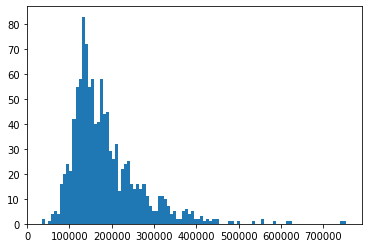

In [75]:
# Find skewness on 'SalePrice' 
# The graphs show 'SalePrice' data is distributed across 100 bins and it is right skewed
import matplotlib.pyplot as plt
plt.hist(df_num2['SalePrice'], bins=100)
plt.show()

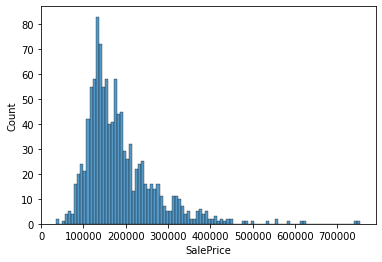

In [25]:
sb.histplot(df_num2['SalePrice'], bins=100)
plt.show()

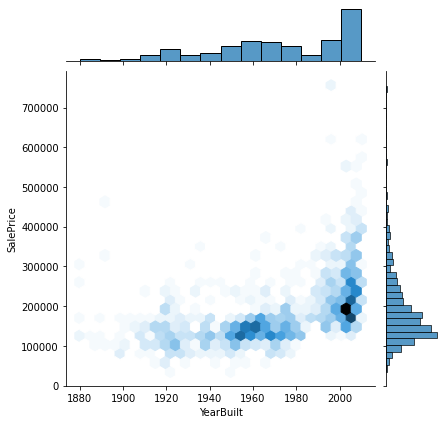

In [78]:
# The following plot shows the significant correlation between year built vs sale price...newer houses have higher sale prices
sb.jointplot(x=df_num2['YearBuilt'],y=df_num2['SalePrice'], kind='hex')

#### 3.c. Identify significant variables using a correlation matrix 

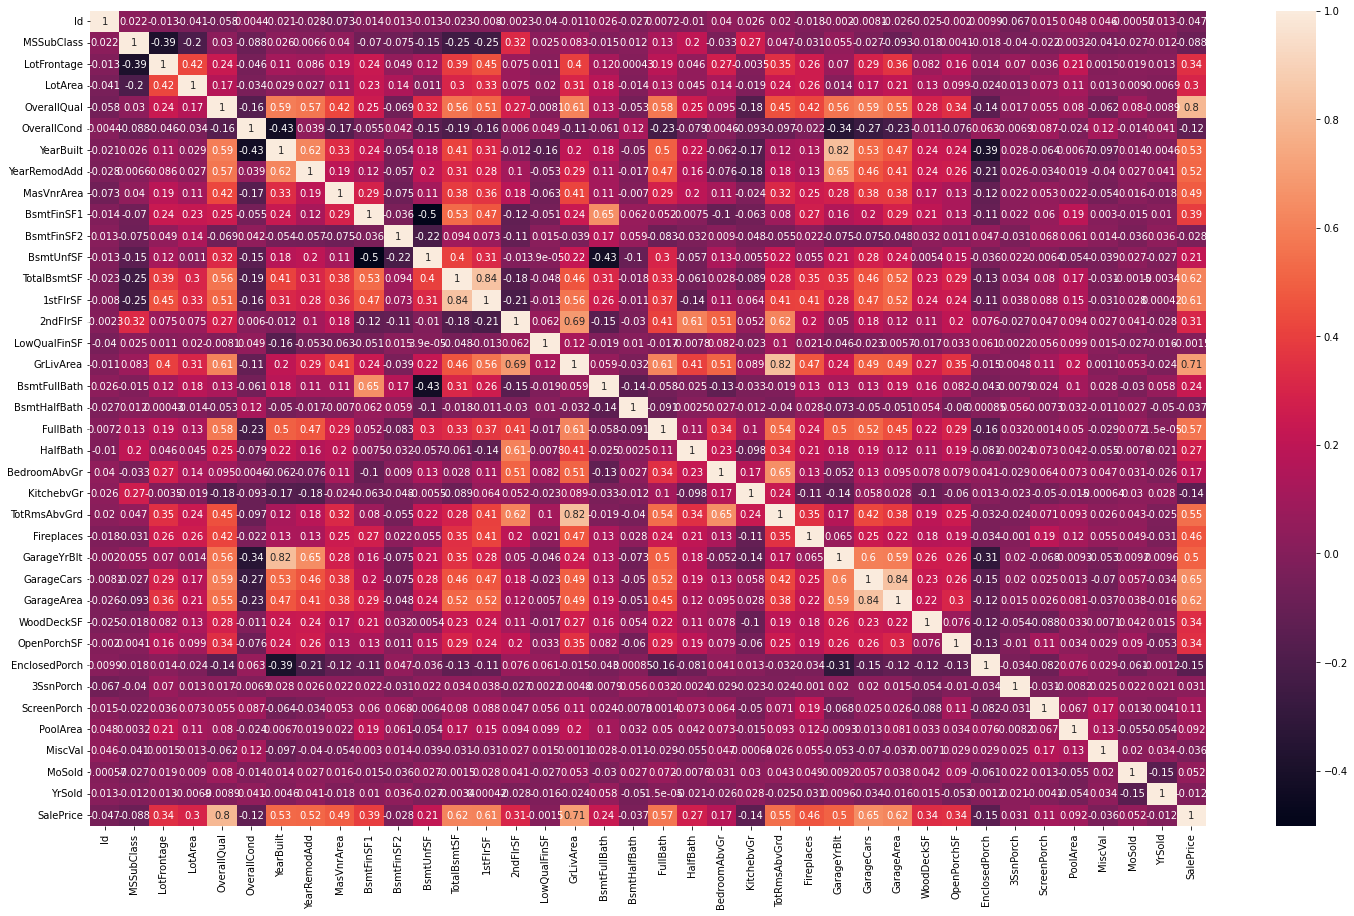

In [77]:
# This shows correlation among all numerical columns
# For example, SalePrice is highly correlated with OverallQual variable.  (Corr = 0.8)
plt.figure(figsize=(25,15))
sb.heatmap(df_num2.corr(), annot=True)
plt.show()

#### 3.d. Pair plot for distribution and density

<Figure size 1080x576 with 0 Axes>

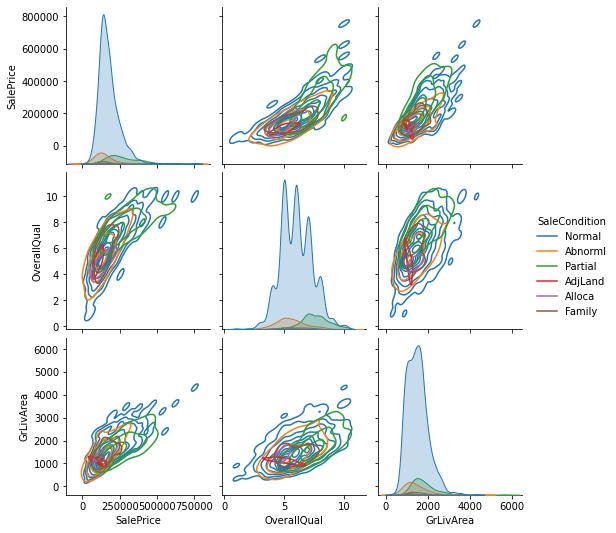

In [34]:
# 3.d. Pair plot for distribution and density
plt.figure(figsize=(15,8))
cols=['SalePrice', 'OverallQual', 'GrLivArea']
sb.pairplot(df, vars=cols, kind='kde', hue='SaleCondition')

## 4. EDA of categorical variables

#### 4.a. Missing Value Treatment

In [80]:
# First find out the missing value variables
df_cat.loc[:, df_cat.isnull().any()].columns

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [51]:
## Copy in another data frame to keep the original data frame intact
## Next identify the variables with missing values
## Use for loop to call one variable at a time and then fill it with 'NaN'

df_cat1 = df_cat.copy()

miss_col=df_cat1.loc[:, df_cat1.isna().any()].columns

for col in miss_col:
    df_cat1[col].fillna('NaN', inplace=True)

In [81]:
df_cat1

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### 4.b. Count plot and box plot for bivariate analysis

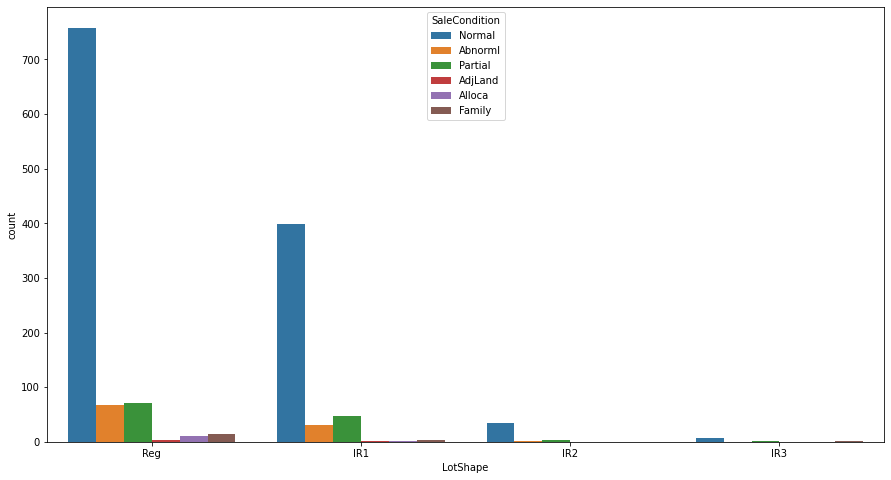

In [82]:
# 4. EDA of categorical variables
# b. Count plot and box plot for bivariate analysis
plt.figure(figsize=(15,8))
sb.countplot(data=df_cat1, x=df_cat1['LotShape'], hue=df_cat1['SaleCondition'])
plt.show()

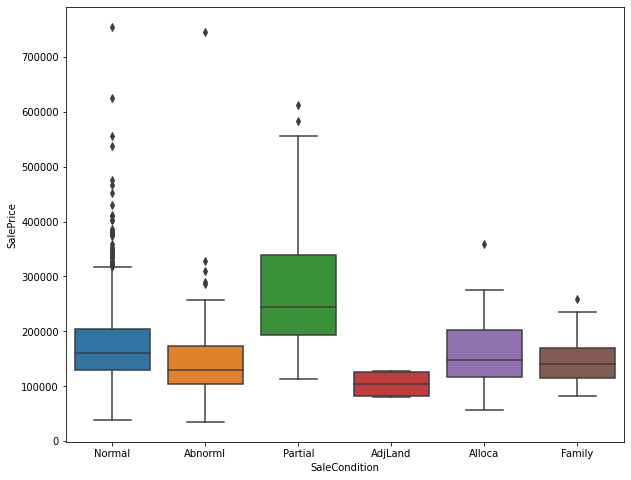

In [101]:
plt.figure(figsize=(10,8))
sb.boxplot(x=df_cat1['SaleCondition'], y=df_num1['SalePrice'])
plt.show()

#### 4.c. Identify significant variables using p-values and Chi-Square values

In [88]:
# First create crosstab and then find p-value and Chi-square values using scipy library
crosstab= pd.crosstab(index=df_cat['Neighborhood'], columns=df_cat['SaleCondition'])
crosstab

SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Neighborhood,,,,,,
Blmngtn,0,0,0,0,12,5
Blueste,0,0,0,0,2,0
BrDale,3,0,0,1,12,0
BrkSide,3,0,0,1,54,0
ClearCr,3,0,0,0,24,1
CollgCr,3,0,0,0,129,18
Crawfor,3,0,2,2,43,1
Edwards,8,4,2,0,82,4
Gilbert,1,0,0,2,64,12


In [97]:
# Printing the p value using scipy library
from scipy.stats import chi2_contingency
c,p,dof,expected=chi2_contingency(crosstab)
#Print p value
print(p)

5.5767782954966265e-43


In [98]:
#Printing the chisquare on all observations in the crosstab
from scipy.stats import chisquare
chisquare(crosstab, axis=None)

Power_divergenceResult(statistic=9471.301369863015, pvalue=0.0)

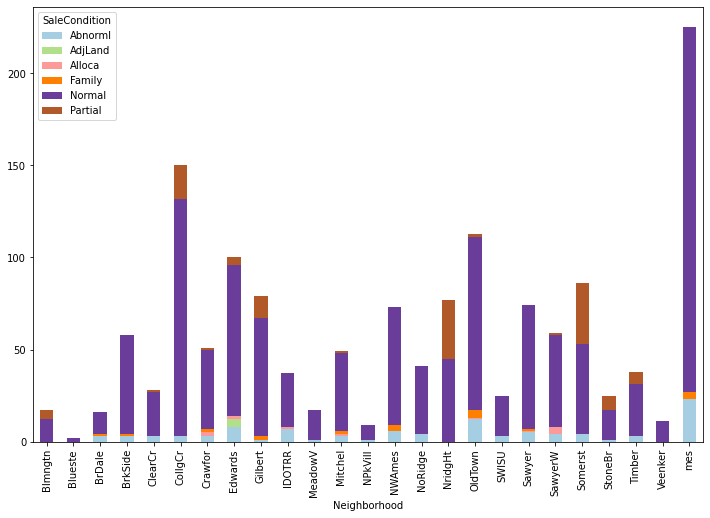

In [38]:
crosstab.plot(kind='bar', figsize=(12,8), stacked=True, colormap='Paired')
plt.show()

## 5. Combine all the significant categorical and numerical variables

In [124]:
# First find the categorical columns to select significant variables.
df_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [125]:
# Then list the numerical columns to select significant variables.
df_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [126]:
# Now use the DataFrame to combine Categorical and Numerical variables.
df_combination=pd.DataFrame({'SaleCondition': df_cat['SaleCondition'], 'Neighborhood': df_cat['Neighborhood'], 
                             'YearBuilt': df_num['YearBuilt'], 'OverallCond': df_num['OverallCond'], 
                             'SalePrice':df_num['SalePrice']})

In [127]:
# List the combined data frame to list significant variables
df_combination

,SaleCondition,Neighborhood,YearBuilt,OverallCond,SalePrice
0,Normal,CollgCr,2003,5,208500
1,Normal,Veenker,1976,8,181500
2,Normal,CollgCr,2001,5,223500
3,Abnorml,Crawfor,1915,5,140000
4,Normal,NoRidge,2000,5,250000
...,...,...,...,...,...
1455,Normal,Gilbert,1999,5,175000
1456,Normal,NWAmes,1978,6,210000
1457,Normal,Crawfor,1941,9,266500
1458,Normal,mes,1950,6,142125


In [128]:
# List the information on variables showing data type and entries. 
df_combination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SaleCondition  1460 non-null   object
 1   Neighborhood   1460 non-null   object
 2   YearBuilt      1460 non-null   int64 
 3   OverallCond    1460 non-null   int64 
 4   SalePrice      1460 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 57.2+ KB


## 6.Plot box plot for the new dataset to find the variables with outliers

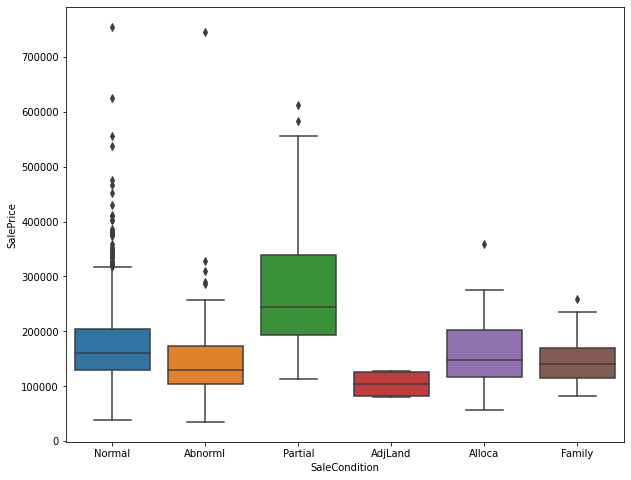

In [130]:
# Box plot using sale condition and sale price variables 
plt.figure(figsize=(10,8))
sb.boxplot(x=df_cat1['SaleCondition'], y=df_num1['SalePrice'])
plt.show()

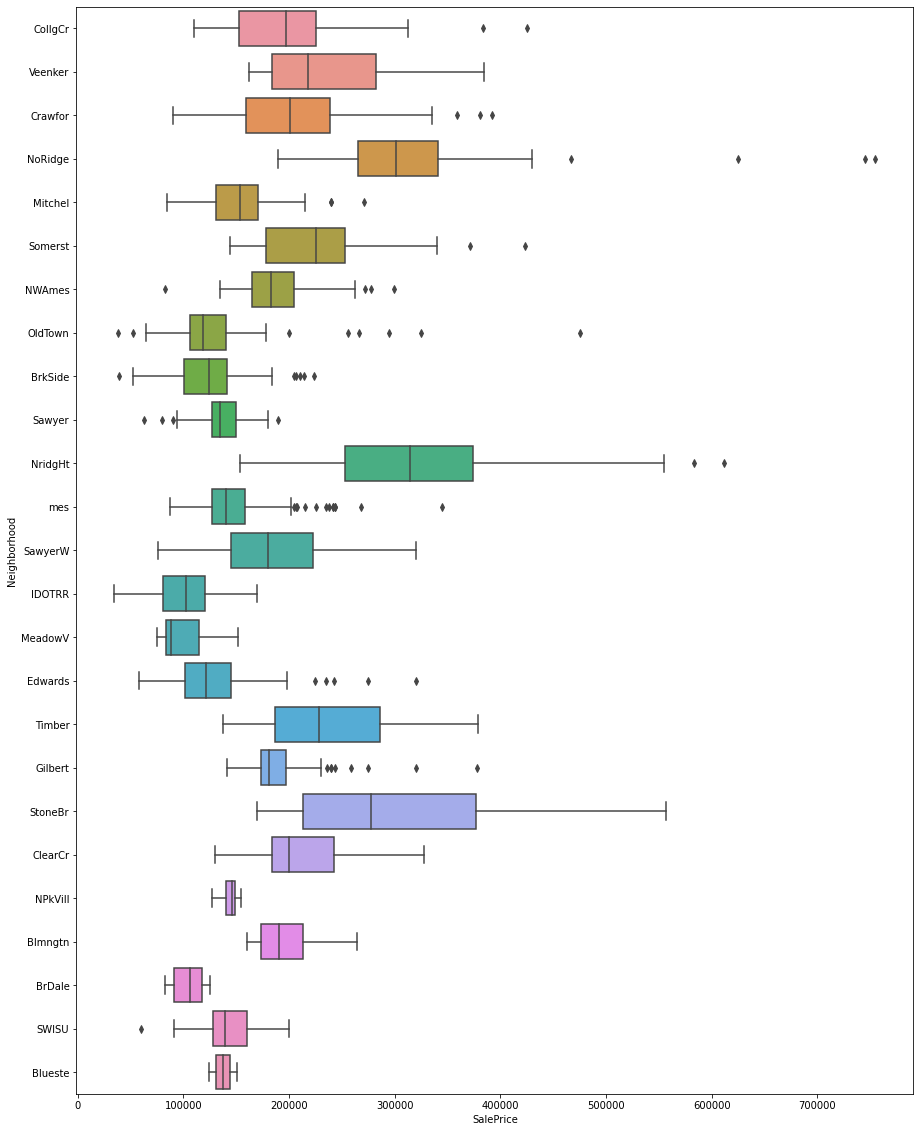

In [139]:
# Boxplot using neighborhood and sale price variables. 
plt.figure(figsize=(15,20))
sb.boxplot(x=df_num1['SalePrice'], y=df_cat1['Neighborhood'])
plt.show()

#### Student: Vinod Sinha
####  Submission Date: December 4, 2022

## The End! 
